In this research, daily measurements were made to get more information about the radiation from the sun. In these measurements, temperature, humidity, pressure, wind direction, speed, sunrise and sunset times were also measured. With the tests below, if there is a relationship between temperature and radiation, it will be tried to find out how

In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

The necessary libraries have been added in order to use them in my code. Necessary adjustments were made to remove errors and make the graphics visible in the code.


In [217]:
veriler=pd.read_csv("/content/drive/My Drive/Colab Notebooks/SolarPrediction.csv",index_col="UNIXTime")
veriler=veriler.dropna(how="any")
veriler=veriler[['Data','TimeSunRise','TimeSunSet','Radiation','Temperature','Pressure','Humidity','WindDirection(Degrees)','Speed']]
veriler=veriler[0:1000]
veriler

,Data,TimeSunRise,TimeSunSet,Radiation,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed
UNIXTime,,,,,,,,,
1475229326,9/29/2016 12:00:00 AM,06:13:00,18:13:00,1.21,48,30.46,59,177.39,5.62
1475229023,9/29/2016 12:00:00 AM,06:13:00,18:13:00,1.21,48,30.46,58,176.78,3.37
1475228726,9/29/2016 12:00:00 AM,06:13:00,18:13:00,1.23,48,30.46,57,158.75,3.37
1475228421,9/29/2016 12:00:00 AM,06:13:00,18:13:00,1.21,48,30.46,60,137.71,3.37
1475228124,9/29/2016 12:00:00 AM,06:13:00,18:13:00,1.17,48,30.46,62,104.95,5.62
...,...,...,...,...,...,...,...,...,...
1474919419,9/26/2016 12:00:00 AM,06:12:00,18:15:00,833.84,57,30.45,72,87.81,6.75
1474919118,9/26/2016 12:00:00 AM,06:12:00,18:15:00,821.11,57,30.45,69,91.00,3.37
1474918826,9/26/2016 12:00:00 AM,06:12:00,18:15:00,805.68,58,30.45,65,2.38,4.50


The CSV file to be used has been defined. To make the table clearer, excessive or insufficient information was removed and the table collapsed.

In [218]:
print("Number of All Days: ",veriler["Data"].count())
print("Some Measure of Central Tendency and Measure of Variability for Temperature: ")
print("-Total of Temperature for All Days: ",veriler["Temperature"].sum())
print("-Arithmetic Mean of Temperature for All Days: ",veriler["Temperature"].mean())
print("-Maximum Value of Temperature for All Days: ",veriler["Temperature"].max())
print("-Minimum Value of Temperature for All Days: ",veriler["Temperature"].min())
temperature_range=veriler["Temperature"].max()-veriler["Temperature"].min()
print("-Range of Temperature for All Days: ",temperature_range)
print("-Median of Temperature for All Days: ",veriler["Temperature"].median())
print("-Standard Deviation of Temperature for All Days: ",veriler["Temperature"].std())
print("-Variance of Temperature for All Days: ",veriler["Temperature"].var())



Number of All Days:  1000
Some Measure of Central Tendency and Measure of Variability for Temperature: 
-Total of Temperature for All Days:  53851
-Arithmetic Mean of Temperature for All Days:  53.851
-Maximum Value of Temperature for All Days:  64
-Minimum Value of Temperature for All Days:  45
-Range of Temperature for All Days:  19
-Median of Temperature for All Days:  52.0
-Standard Deviation of Temperature for All Days:  6.028859439906217
-Variance of Temperature for All Days:  36.3471461461463


Some measure of central tendency and measure of variability for temperature were calculated by defining codes suitable for them. As a result of these measurements, the temperature during the day was measured as maximum 64 degrees Fahrenheit and minimum 45 degrees Fahrenheit. The mean of 1000 days has been calculated as 53.851 fahrenheit and the standard deviation as 6.028859439906217 fahrenheit.






In [219]:
print("Number of All Days: ",veriler["Data"].count())
print("Some Measure of Central Tendency and Measure of Variability for Radiation: ")
print("-Total of Radiation for All Days: ",veriler["Radiation"].sum())
print("-Arithmetic Mean of Radiation for All Days: ",veriler["Radiation"].mean())
print("-Maximum Value of Radiation for All Days: ",veriler["Radiation"].max())
print("-Minimum Value of Radiation for All Days: ",veriler["Radiation"].min())
radiation_range=veriler["Radiation"].max()-veriler["Radiation"].min()
print("-Range of Radiation for All Days: ",radiation_range)
print("-Median of Radiation for All Days: ",veriler["Radiation"].median())
print("-Standard Deviation of Radiation for All Days: ",veriler["Radiation"].std())
print("-Variance of Radiation for All Days: ",veriler["Radiation"].var())

Number of All Days:  1000
Some Measure of Central Tendency and Measure of Variability for Radiation: 
-Total of Radiation for All Days:  295937.92
-Arithmetic Mean of Radiation for All Days:  295.9379199999998
-Maximum Value of Radiation for All Days:  1387.17
-Minimum Value of Radiation for All Days:  1.15
-Range of Radiation for All Days:  1386.02
-Median of Radiation for All Days:  9.775
-Standard Deviation of Radiation for All Days:  384.5087831613237
-Variance of Radiation for All Days:  147847.00432820187


Some measure of central tendency and measure of variability for radiation were calculated by defining codes suitable for them. As a result of these measurements, the temperature during the day was measured as maximum 1387.17 (watts per meter^2) and minimum 1.15 (watts per meter^2). The mean of 1000 days has been calculated as 295.9379199999998 (watts per meter^2) and the standard deviation as 384.5087831613237 (watts per meter^2).

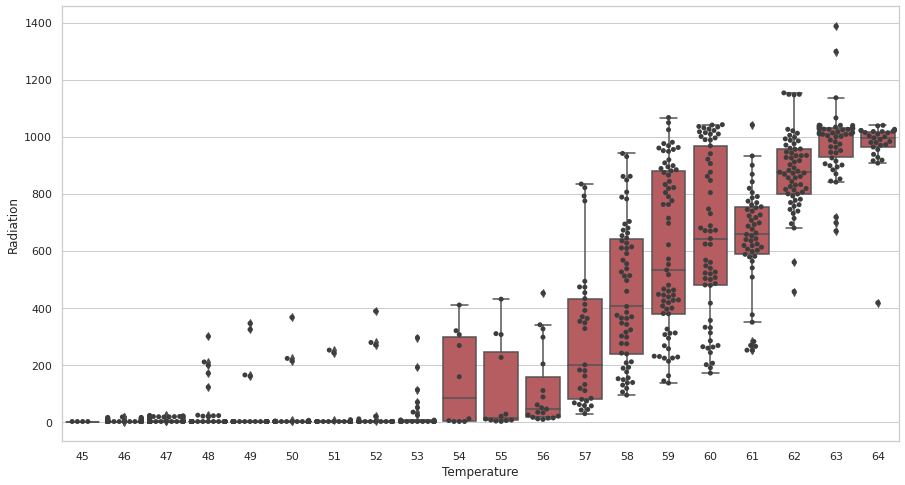

In [220]:
fig, ax = plt.subplots(figsize=(15,8))
grafik_1=sns.boxplot(x="Temperature", y="Radiation", data=veriler,ax=ax,color="r")
grafik_1=sns.swarmplot(x="Temperature", y="Radiation", data=veriler, color=".24",ax=ax)


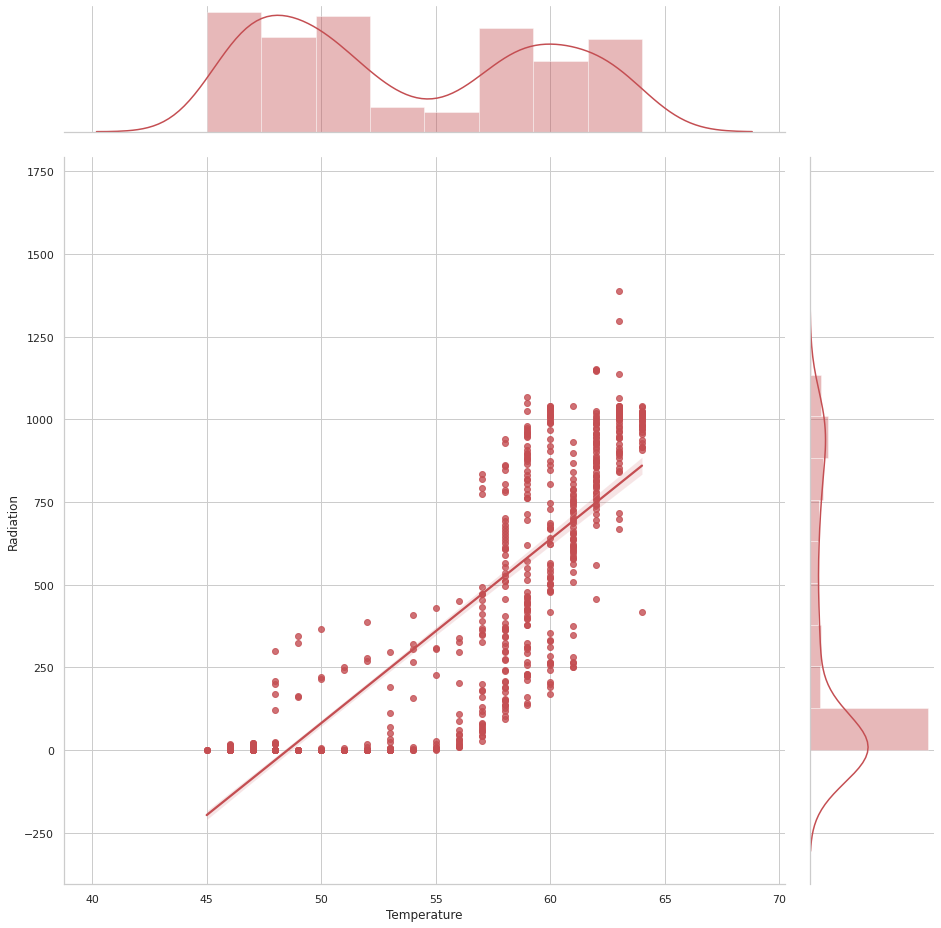

In [221]:

sns.jointplot(veriler["Temperature"], veriler["Radiation"], data = veriler,size=13,kind="reg",color="r")



Temperature and radiation were compared in both graphs and the relationship between them was observed. Although it is not valid for all days, as the temperature increases, the radiation also increased. That is, temperature and radiation are directly proportional.

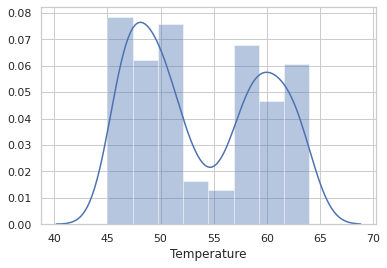

In [222]:
sns.distplot(veriler["Temperature"])

There are some interesting data out of the distribution of the graph. The data for the temperature are very different from the normal distribution image. Other methods should be applied to find out that this graph is normal distribution.

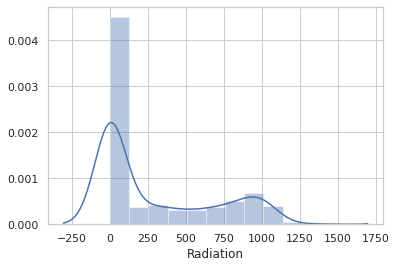

In [223]:
sns.distplot(veriler["Radiation"])

There are some interesting data out of the distribution of the graph.The distribution formed in this graph is more similar to the normal distribution than the other graph. But other methods should be applied to find out that this graph is normal distribution.

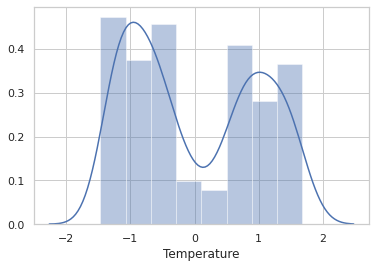

In [224]:
veriler["Temperature"]=(veriler["Temperature"]-veriler["Temperature"].mean())/veriler["Temperature"].std()
veriler["Radiation"]=(veriler["Radiation"]-veriler["Radiation"].mean())/veriler["Radiation"].std()
sns.distplot(veriler["Temperature"])



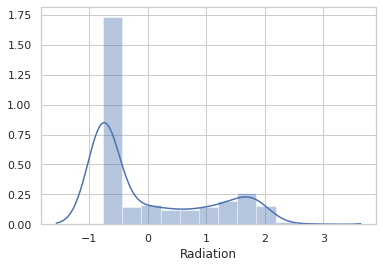

In [225]:
sns.distplot(veriler["Radiation"])

Since the distribution of data for both data is at the beginning and the majority at the end, the normal distribution graph is also far from normal.

In [228]:
a=veriler["Temperature"]
b=veriler["Radiation"]
print("stats.zscore(a))
print(stats.zscore(b))

[-0.97098427 -0.97098427 -0.97098427 -0.97098427 -0.97098427 -0.97098427
 -0.80503242 -0.80503242 -0.80503242 -0.80503242 -0.80503242 -0.80503242
 -0.80503242 -0.63908057 -0.63908057 -0.63908057 -0.63908057 -0.63908057
 -0.63908057 -0.63908057 -0.63908057 -0.63908057 -0.63908057 -0.63908057
 -0.63908057 -0.63908057 -0.63908057 -0.63908057 -0.63908057 -0.63908057
 -0.63908057 -0.63908057 -0.63908057 -0.80503242 -0.63908057 -0.63908057
 -0.63908057 -0.63908057 -0.63908057 -0.63908057 -0.63908057 -0.63908057
 -0.63908057 -0.63908057 -0.63908057 -0.63908057 -0.63908057 -0.63908057
 -0.63908057 -0.63908057 -0.63908057 -0.63908057 -0.63908057 -0.63908057
 -0.47312872 -0.47312872 -0.47312872 -0.47312872 -0.47312872 -0.47312872
 -0.47312872 -0.47312872 -0.47312872 -0.30717687 -0.30717687 -0.30717687
 -0.30717687 -0.14122502 -0.14122502 -0.14122502  0.02472683  0.19067868
  0.19067868  0.35663052  0.35663052  0.35663052  0.35663052  0.35663052
  0.52258237  0.52258237  0.68853422  0.68853422  0